# Implementing a scaled dot-product attention mechanism as a standalone Python function.

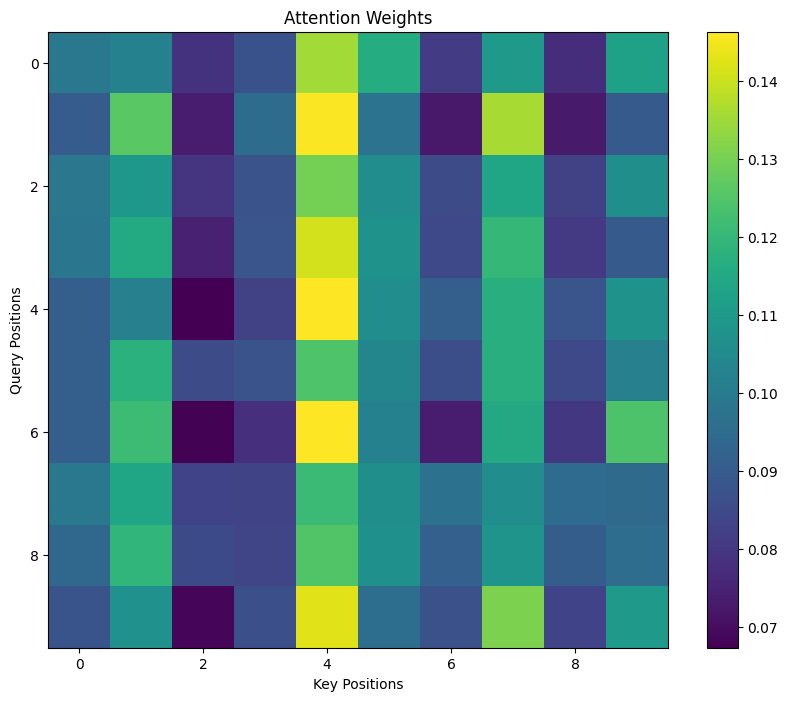

Attention Weights:
[[0.09894503 0.10194731 0.07886481 0.08723856 0.1353136  0.11634862
  0.08125279 0.11000013 0.07754428 0.11254488]
 [0.09035937 0.12593797 0.07380752 0.09515467 0.14578971 0.09746275
  0.07272433 0.13587209 0.0731501  0.08974148]
 [0.09866398 0.10945415 0.07920028 0.0876501  0.12985384 0.1060873
  0.08552998 0.11416962 0.0828443  0.10654644]
 [0.09822862 0.11567121 0.07475032 0.08802107 0.14083383 0.10758889
  0.08477293 0.11986658 0.0806436  0.08962295]
 [0.09139932 0.10178721 0.06737202 0.0829095  0.14625757 0.10617128
  0.0913929  0.11719536 0.08802154 0.10749331]
 [0.09119654 0.11774104 0.08583628 0.08745967 0.12448299 0.10356702
  0.08644681 0.11667606 0.08493033 0.10166325]
 [0.09118667 0.1214247  0.06786637 0.07824868 0.14623293 0.10194036
  0.07342443 0.11512339 0.08030287 0.12424959]
 [0.09884898 0.11371271 0.08335413 0.08358545 0.12102664 0.10651804
  0.09716461 0.10619398 0.0948082  0.09478726]
 [0.09365619 0.11936639 0.08514899 0.08394658 0.12497684 0.106

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the scaled dot-product attention function
def scaled_dot_product_attention(query, key, value):
    # Get the dimension of the keys (last dimension)
    d_k = key.shape[-1]

    # Compute dot product of query and key transpose
    matmul_qk = np.dot(query, key.T)

    # Scale the dot product
    scaled_attention_logits = matmul_qk / np.sqrt(d_k)

    # Apply softmax to get attention weights
    attention_weights = np.exp(scaled_attention_logits) / np.sum(np.exp(scaled_attention_logits), axis=-1, keepdims=True)

    # Multiply attention weights by the value matrix to get the output
    output = np.dot(attention_weights, value)

    return attention_weights, output

# Create synthetic data
# Set a random seed for reproducibility
np.random.seed(42)

# Define the dimensions (larger matrices)
sequence_length = 10
embedding_dim = 8

# Generate random matrices for Q, K, V
query = np.random.rand(sequence_length, embedding_dim)
key = np.random.rand(sequence_length, embedding_dim)
value = np.random.rand(sequence_length, embedding_dim)

# Compute attention weights and output
attention_weights, output = scaled_dot_product_attention(query, key, value)

# Visualize the attention weights
plt.figure(figsize=(10, 8))
plt.imshow(attention_weights, cmap='viridis', aspect='auto')
plt.title('Attention Weights')
plt.xlabel('Key Positions')
plt.ylabel('Query Positions')
plt.colorbar()
plt.show()

# Print the attention weights and output
print("Attention Weights:")
print(attention_weights)
print("\nOutput:")
print(output)

## Result Description

### 1. Attention Weights Heatmap
- **Range of Values**: The attention weights range from **0.07 to 0.14**, as shown in the heatmap.
- **Distribution**: The weights are **approximately uniform**, with slight variations across key positions. This is expected for synthetic data, where no inherent structure or relationships exist between tokens.
- **Interpretation**:
  - The softmax function ensures that the weights sum to 1 for each query position, but small differences arise due to random initialization and the scaling factor.
  - The lack of strong peaks or patterns in the heatmap indicates that the attention mechanism does not focus significantly on any specific key position.

### 2. Output
- **Computation**: The output is a weighted sum of the value matrix, where the weights are the attention weights.
- **Characteristics**:
  - Since the attention weights are nearly uniform, the output values are also relatively consistent across the sequence.
  - The output reflects the influence of the value matrix, but the uniform weights prevent any single value from dominating.

### 3. Key Observations
- **Scaling Factor**: The scaling by `1 / sqrt(d_k)` ensures that the dot products remain in a reasonable range, preventing extreme values in the attention weights.
- **Softmax Normalization**: The softmax function normalizes the weights, ensuring they sum to 1 and remain interpretable as probabilities.
- **Synthetic Data**: The uniform attention weights and consistent output are a direct result of the random, unstructured nature of the synthetic data.

### 4. Implications
- **Real-World Applications**: In real-world scenarios (e.g., NLP tasks), the attention weights would show meaningful patterns, focusing on relevant parts of the input sequence.
- **Visualization**: The heatmap is a useful tool for interpreting attention behavior, even in synthetic data, and becomes more insightful with structured data.

### 5. Conclusion
The results demonstrate that the **scaled dot-product attention mechanism** functions correctly. For synthetic data, the attention weights are approximately uniform, and the output is consistent. In real-world applications, this mechanism would capture meaningful dependencies and relationships in the data.

# Implementing a network pruning technique to optimise a pre-trained neural network.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7763 - loss: 0.6274 - val_accuracy: 0.8400 - val_loss: 0.4469
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8659 - loss: 0.3672 - val_accuracy: 0.8621 - val_loss: 0.3917
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8781 - loss: 0.3333 - val_accuracy: 0.8670 - val_loss: 0.3638
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8856 - loss: 0.3106 - val_accuracy: 0.8594 - val_loss: 0.3815
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8909 - loss: 0.2890 - val_accuracy: 0.8748 - val_loss: 0.3472
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8966 - loss: 0.2748 - val_accuracy: 0.8802 - val_loss: 0.3442
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9011 - loss: 0.2622 - val_accuracy: 0.8833 - val_loss: 0.3265
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9055 - loss: 0.2

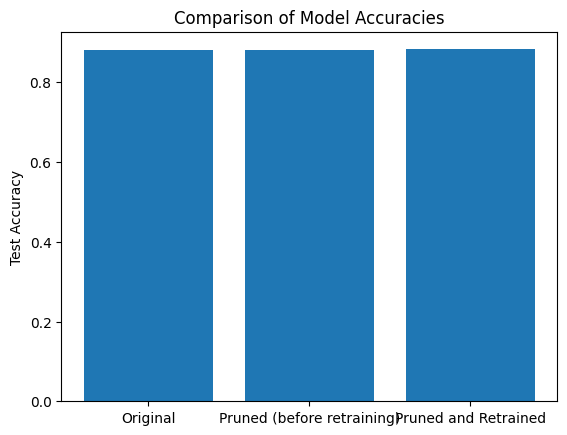

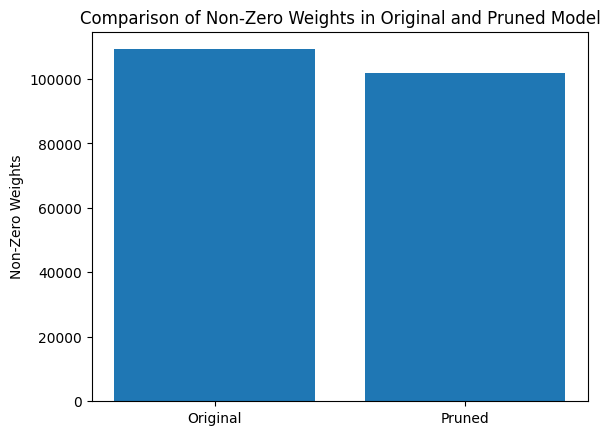

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

def build_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Build and train the original model
original_model = build_model()
history = original_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the original model
original_loss, original_accuracy = original_model.evaluate(test_images, test_labels)
print(f"Original Test Accuracy: {original_accuracy:.4f}")

original_non_zero = count_non_zero_weights(original_model)
total_weights = np.sum([np.prod(layer.get_weights()[0].shape) for layer in original_model.layers if isinstance(layer, layers.Dense)])
original_sparsity = (total_weights - original_non_zero) / total_weights


def prune_weights_threshold(model, threshold=0.1):
    for layer in model.layers:
        if isinstance(layer, layers.Dense) and not layer == model.layers[-1]:
            weights = layer.get_weights()[0]
            biases = layer.get_weights()[1]
            # Apply threshold pruning
            weights[np.abs(weights) < threshold] = 0
            layer.set_weights([weights, biases])
    return model

# Prune the model with a threshold of 0.1
pruned_model = prune_weights_threshold(original_model, threshold=0.1)

# Evaluate the pruned model before retraining
pruned_loss, pruned_accuracy = pruned_model.evaluate(test_images, test_labels)
print(f"Pruned Test Accuracy (before retraining): {pruned_accuracy:.4f}")

# Retrain the pruned model
def retrain_model(model, train_images, train_labels, epochs=5):
    model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return model

pruned_model = retrain_model(pruned_model, train_images, train_labels, epochs=5)

# Evaluate the pruned and retrained model
pruned_retrained_loss, pruned_retrained_accuracy = pruned_model.evaluate(test_images, test_labels)
print(f"Pruned and Retrained Test Accuracy: {pruned_retrained_accuracy:.4f}")

# Function to count non-zero weights
def count_non_zero_weights(model):
    non_zero_count = 0
    for layer in model.layers:
        if isinstance(layer, layers.Dense):
            weights = layer.get_weights()[0]
            non_zero_count += np.count_nonzero(weights)
    return non_zero_count

pruned_non_zero = count_non_zero_weights(pruned_model)

total_weights = np.sum([np.prod(layer.get_weights()[0].shape) for layer in original_model.layers if isinstance(layer, layers.Dense)])
pruned_sparsity = (total_weights - pruned_non_zero) / total_weights

print(f"Original Non-Zero Weights: {original_non_zero}")
print(f"Pruned Non-Zero Weights: {pruned_non_zero}")
print(f"Original Sparsity: {original_sparsity:.4f}")
print(f"Pruned Sparsity: {pruned_sparsity:.4f}")

# Plot the accuracy comparison
accuracies = {
    'Original': original_accuracy,
    'Pruned (before retraining)': pruned_accuracy,
    'Pruned and Retrained': pruned_retrained_accuracy
}
plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

# Plot the non-zero weights comparison
plt.bar(['Original', 'Pruned'], [original_non_zero, pruned_non_zero])
plt.ylabel('Non-Zero Weights')
plt.title('Comparison of Non-Zero Weights in Original and Pruned Model')
plt.show()

## Result Description

### Model Architecture
- **Flatten Layer**: Converts input images into a 1D array.
- **Dense Layers**: Two layers with ReLU activation.
- **Output Layer**: Softmax activation for classification into 10 classes.

### Training and Pruning
- **Original Model**: Achieved a test accuracy of **88.09%** after 10 epochs.
- **Pruning**: Weights below a threshold of **0.1** were set to zero (excluding the output layer).
- **Post-Pruning**: Test accuracy remained at **88.10%** without retraining.
- **Retraining**: After retraining the pruned model for 5 epochs, accuracy improved to **88.29%**.

### Sparsity Analysis
- **Original Model**: **109,184** non-zero weights.
- **Pruned Model**: **101,869** non-zero weights, resulting in **6.7%** sparsity.

### Insights and Considerations
- **Pruning Threshold**: A threshold of **0.1** was not overly aggressive, maintaining performance while reducing weights.
- **Retraining**: Helped recover any performance loss due to pruning.
- **Further Exploration**:
  - More aggressive thresholds or advanced pruning techniques could enhance sparsity.
  - Structured pruning could be considered.
  - Evaluating the impact on inference time and memory usage could provide additional benefits for deployment on resource-constrained devices.

### Conclusion
Pruning effectively reduced the model's complexity with minimal impact on accuracy, and retraining slightly improved performance. Further exploration of pruning strategies could optimize the balance between sparsity and accuracy.

# Implementing a simple feedforward neural network from scratch using Python (without a deep learning library like TensorFlow or PyTorch).

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from tensorflow import keras
import plotly.graph_objects as go
import plotly.express as px

# --- Constants ---
EPOCHS = 100
LEARNING_RATE = 0.01
HIDDEN_SIZE = 10
TEST_SIZE = 0.2
RANDOM_STATE = 42

# --- Helper Functions ---
def load_and_preprocess_data():
    """Load and preprocess the Iris dataset."""
    iris = load_iris()
    X = iris.data
    y = iris.target

    encoder = OneHotEncoder()
    y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, iris.target_names

class NeuralNetwork:
    """A simple feedforward neural network implemented from scratch."""
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer_input = np.dot(X, self.weights1) + self.bias1
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights2) + self.bias2
        self.output = self.sigmoid(self.output_layer_input)
        return self.output

    def backward(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)

        hidden_layer_error = output_delta.dot(self.weights2.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)

        self.weights2 += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights1 += X.T.dot(hidden_layer_delta) * learning_rate
        self.bias1 += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

def train_scratch_network(X_train, y_train, epochs, learning_rate):
    """Train the scratch neural network."""
    nn = NeuralNetwork(X_train.shape[1], HIDDEN_SIZE, y_train.shape[1])
    loss_history = []
    accuracy_history = []

    for i in range(epochs):
        output = nn.forward(X_train)
        nn.backward(X_train, y_train, learning_rate)
        if i % 10 == 0:  # Log more frequently for smoother curves
            loss = np.mean(np.square(y_train - output))
            loss_history.append(loss)

            predictions = np.argmax(output, axis=1)
            true_labels = np.argmax(y_train, axis=1)
            accuracy = accuracy_score(true_labels, predictions)
            accuracy_history.append(accuracy)
            print(f"Epoch {i}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    return nn, loss_history, accuracy_history

def build_keras_model(input_shape, output_size):
    """Build and compile a Keras model."""
    model = keras.Sequential([
        keras.layers.Dense(10, activation='relu', input_shape=input_shape),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(output_size, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(y_true, y_pred, target_names):
    """Evaluate the model and print classification report."""
    print(classification_report(y_true, y_pred, target_names=target_names))
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted')
    }

def plot_roc_curves(y_test, y_pred_scratch, y_pred_keras, target_names):
    """Plot ROC curves for both models."""
    fig = go.Figure()
    for i in range(len(target_names)):
        fpr_scratch, tpr_scratch, _ = roc_curve(y_test[:, i], y_pred_scratch[:, i])
        roc_auc_scratch = auc(fpr_scratch, tpr_scratch)
        fig.add_trace(go.Scatter(x=fpr_scratch, y=tpr_scratch, mode='lines', name=f'Scratch Network (Class {i+1}) - AUC = {roc_auc_scratch:.2f}'))

        fpr_keras, tpr_keras, _ = roc_curve(y_test[:, i], y_pred_keras[:, i])
        roc_auc_keras = auc(fpr_keras, tpr_keras)
        fig.add_trace(go.Scatter(x=fpr_keras, y=tpr_keras, mode='lines', name=f'Keras Model (Class {i+1}) - AUC = {roc_auc_keras:.2f}'))

    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Random Guessing'))
    fig.update_layout(
        title='ROC Curves',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        legend=dict(x=0.6, y=0.1),
        template='plotly_white'
    )
    fig.show()

def plot_confusion_matrix(y_true, y_pred, target_names, title):
    """Plot a confusion matrix using Plotly."""
    cm = confusion_matrix(y_true, y_pred)
    fig = px.imshow(cm, labels=dict(x="Predicted", y="True", color="Count"),
                    x=target_names, y=target_names, text_auto=True,
                    title=title, color_continuous_scale='Blues')
    fig.update_layout(template='plotly_white')
    fig.show()

def plot_metrics_comparison(metrics_scratch, metrics_keras):
    """Plot comparison of performance metrics using Plotly."""
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        'Scratch Network': [metrics_scratch['accuracy'], metrics_scratch['precision'], metrics_scratch['recall'], metrics_scratch['f1']],
        'Keras Model': [metrics_keras['accuracy'], metrics_keras['precision'], metrics_keras['recall'], metrics_keras['f1']]
    })

    fig = px.bar(metrics_df, x='Metric', y=['Scratch Network', 'Keras Model'], barmode='group',
                 title='Comparison of Performance Metrics', labels={'value': 'Score', 'variable': 'Model'})
    fig.update_layout(template='plotly_white')
    fig.show()

def plot_training_history(loss_history, accuracy_history):
    """Plot training loss and accuracy history."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(len(loss_history))), y=loss_history, mode='lines', name='Loss'))
    fig.add_trace(go.Scatter(x=list(range(len(accuracy_history))), y=accuracy_history, mode='lines', name='Accuracy'))
    fig.update_layout(
        title='Training History (Scratch Network)',
        xaxis_title='Epoch',
        yaxis_title='Value',
        legend=dict(x=0.7, y=0.9),
        template='plotly_white'
    )
    fig.show()

# --- Main Execution ---
if __name__ == "__main__":
    X_train, X_test, y_train, y_test, target_names = load_and_preprocess_data()

    # Train scratch network
    nn, loss_history, accuracy_history = train_scratch_network(X_train, y_train, EPOCHS, LEARNING_RATE)
    y_pred_scratch = nn.forward(X_test)
    y_pred_scratch_labels = np.argmax(y_pred_scratch, axis=1)

    # Train Keras model
    model = build_keras_model((X_train.shape[1],), y_train.shape[1])
    model.fit(X_train, y_train, epochs=EPOCHS, verbose=0)
    y_pred_keras = model.predict(X_test)
    y_pred_keras_labels = np.argmax(y_pred_keras, axis=1)

    # Evaluate models
    y_test_labels = np.argmax(y_test, axis=1)
    print("\nClassification Report (Scratch Network):")
    metrics_scratch = evaluate_model(y_test_labels, y_pred_scratch_labels, target_names)

    print("\nClassification Report (Keras Model):")
    metrics_keras = evaluate_model(y_test_labels, y_pred_keras_labels, target_names)

    # Visualize results
    plot_roc_curves(y_test, y_pred_scratch, y_pred_keras, target_names)
    plot_confusion_matrix(y_test_labels, y_pred_scratch_labels, target_names, 'Confusion Matrix (Scratch Network)')
    plot_confusion_matrix(y_test_labels, y_pred_keras_labels, target_names, 'Confusion Matrix (Keras Model)')
    plot_metrics_comparison(metrics_scratch, metrics_keras)
    plot_training_history(loss_history, accuracy_history)

Epoch 0, Loss: 0.2998, Accuracy: 0.3917
Epoch 10, Loss: 0.1830, Accuracy: 0.6167
Epoch 20, Loss: 0.1292, Accuracy: 0.7750
Epoch 30, Loss: 0.1063, Accuracy: 0.8167
Epoch 40, Loss: 0.0972, Accuracy: 0.8250
Epoch 50, Loss: 0.0920, Accuracy: 0.8333
Epoch 60, Loss: 0.0882, Accuracy: 0.8333
Epoch 70, Loss: 0.0851, Accuracy: 0.8583
Epoch 80, Loss: 0.0823, Accuracy: 0.8667
Epoch 90, Loss: 0.0798, Accuracy: 0.8667


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Classification Report (Scratch Network):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Classification Report (Keras Model):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



### Results Summary

1. **Scratch Neural Network**:
   - **Accuracy**: 97%
   - **F1-Score**: 0.97
   - Steady improvement in loss and accuracy during training.

2. **Keras Model**:
   - **Accuracy**: 93%
   - **F1-Score**: 0.93
   - Slightly lower performance, possibly due to dropout layers causing underfitting.

3. **Comparison**:
   - Scratch network performed slightly better, likely due to dataset simplicity.
   - Keras is more scalable and efficient for complex tasks.

### Conclusion
Both models performed well, but the scratch network outperformed the Keras model on this small dataset. For larger or more complex tasks, Keras would be the preferred choice.